In [ ]:
# Dataset: Porto Seguro’s Safe Driver Prediction
# Predicting if a driver will file an insurance claim next year.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [16]:
# Uploading the dataset with only 200,000 samples out of 500,000 for quick processing
data = pd.read_csv('train.csv', nrows=200000)

In [17]:
data.shape

(200000, 59)

In [5]:
data.sample(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
52486,131559,0,0,1,7,0,0,1,0,0,...,4,0,1,2,0,0,0,0,1,0
61458,154034,0,0,1,4,0,2,1,0,0,...,6,4,3,6,0,1,0,1,1,0
78884,197334,0,5,1,2,0,0,0,0,1,...,5,0,3,16,0,1,0,0,0,0
7476,18963,0,1,1,7,0,0,0,0,1,...,6,2,1,5,0,1,0,0,0,0
87299,218397,0,5,1,5,0,0,0,0,1,...,2,1,0,10,0,0,1,1,0,0


In [20]:
# There are some null values that need to be removed
data.isna().sum()

In [18]:
data.dropna(inplace=True)
data.shape

(200000, 59)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [20]:
# Separting input and output variables
X = data.drop(columns=['target'])
Y = data['target']

In [21]:
# Dividing the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

X_train.shape, X_test.shape

((160000, 58), (40000, 58))

In [12]:
# Applying KNN Before PCA and checking the accuracy score
def KNN_Classifier(X_train, y_train, X_test, y_test):
  start = time.time()
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print('Time Taken:', time.time()- start)


In [13]:
KNN_Classifier(X_train, y_train, X_test, y_test)

Accuracy score:  0.9608
Time Taken: 64.21063685417175


In [33]:
# Checking accuracy score after applying PCA
# By specifying 0.95 for n_components hyperparamter, we want to preserve 95% of the variance
def KNN_PCA(X_train, X_test, y_train, y_test):
  start = time.time()
  pca = PCA(n_components=0.95)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)

  knn = KNeighborsClassifier()
  knn.fit(X_train_trf, y_train)
  y_pred = knn.predict(X_test_trf)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print('Time taken: ', time.time() - start)
  return pca

In [34]:
pca = KNN_PCA(X_train, X_test, y_train, y_test)

Accuracy score:  0.9605
Time taken:  3.495605945587158


In [45]:
pca.components_

array([[ 1.00000000e+00, -5.44637619e-09,  1.56352111e-08,
         3.19097111e-08, -4.95458460e-09,  6.60595415e-09,
         9.17953134e-10,  5.37005849e-09, -6.82259621e-09,
         5.34584591e-10, -5.66907970e-10, -1.23180220e-09,
         6.84897450e-10, -3.38889628e-10, -1.45270235e-09,
        -4.72267783e-09, -6.50786462e-09,  1.24382436e-09,
         8.52521733e-09,  8.05622691e-10,  1.64813314e-09,
         2.18028251e-08, -4.98010001e-08, -1.48781277e-09,
        -1.82357688e-08,  2.09861665e-08,  2.23237146e-09,
        -7.11680314e-09, -1.26582981e-08,  1.16702391e-09,
        -1.09524594e-08, -3.22051504e-09,  6.96586953e-07,
        -2.23579887e-08,  1.72717092e-09,  5.56228582e-09,
        -4.26283993e-09,  2.65590787e-09,  3.57161088e-09,
         1.16750991e-09, -2.43068850e-09, -6.78833269e-09,
        -1.53742714e-08, -2.42372577e-08,  4.29329109e-08,
         1.49572586e-08,  4.85852902e-09,  6.22762346e-08,
        -4.12039202e-08, -2.03984609e-08,  2.59060505e-0

In [44]:
pca.components_.shape

(1, 58)

In [43]:
pca.explained_variance_

array([2.07995738e+10])

In [42]:
pca.explained_variance_ratio_

array([0.99999994])

In [46]:
# Checking accuracy score after applying PCA with n_components set to 'None'
def KNN_PCA(X_train, X_test, y_train, y_test):
  start = time.time()
  pca = PCA(n_components=None)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)

  knn = KNeighborsClassifier()
  knn.fit(X_train_trf, y_train)
  y_pred = knn.predict(X_test_trf)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print('Time taken: ', time.time() - start)
  return pca

In [47]:
pca = KNN_PCA(X_train, X_test, y_train, y_test)

Accuracy score:  0.9608
Time taken:  62.40880846977234


In [48]:
pca.components_

array([[ 1.00000000e+00, -5.44637619e-09,  1.56352111e-08, ...,
         2.75534445e-09, -1.73088199e-08,  7.79212507e-09],
       [-6.96595823e-07,  1.86679485e-04,  3.29844971e-04, ...,
        -4.00570123e-06, -9.24031134e-06,  3.54179001e-05],
       [ 1.03183118e-08,  3.11820833e-02, -2.40552155e-03, ...,
         1.97844109e-04,  6.21274060e-05, -1.37727295e-05],
       ...,
       [ 4.99560243e-10, -1.59845498e-05, -5.07642217e-05, ...,
         1.19476921e-04,  2.94784043e-05,  1.53025137e-04],
       [-0.00000000e+00,  2.65064998e-14, -5.74578395e-15, ...,
         6.36389171e-15,  2.49875968e-14, -4.90205109e-14],
       [ 0.00000000e+00,  6.87453161e-15,  1.66045912e-14, ...,
        -2.18372735e-13, -1.47553061e-13, -1.90408355e-17]])

In [49]:
pca.explained_variance_

array([2.07995738e+10, 1.09118691e+03, 3.04504975e+01, 1.32699595e+01,
       8.46736912e+00, 7.53282094e+00, 7.32523753e+00, 6.41629165e+00,
       5.41782336e+00, 4.33136460e+00, 3.53093742e+00, 2.87276879e+00,
       2.13544724e+00, 2.00559182e+00, 1.81545630e+00, 1.78416998e+00,
       1.55628309e+00, 1.45153737e+00, 1.29005672e+00, 1.24796563e+00,
       1.01233057e+00, 9.54433552e-01, 7.21485805e-01, 6.41601534e-01,
       5.39608286e-01, 4.55071598e-01, 3.11042168e-01, 2.62475707e-01,
       2.47117538e-01, 2.33436738e-01, 2.27177935e-01, 2.08739082e-01,
       2.05067264e-01, 1.71712528e-01, 1.69637634e-01, 1.55700645e-01,
       1.31024643e-01, 1.29958979e-01, 1.20659786e-01, 1.18897015e-01,
       1.07894423e-01, 1.05256377e-01, 9.78017548e-02, 9.56419497e-02,
       8.25944356e-02, 8.25210412e-02, 8.14972766e-02, 4.10814213e-02,
       2.38884308e-02, 1.86366286e-02, 1.23167334e-02, 8.26217075e-03,
       2.40360748e-03, 1.20059323e-03, 1.00753877e-03, 4.05841407e-04,
      

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99999994, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

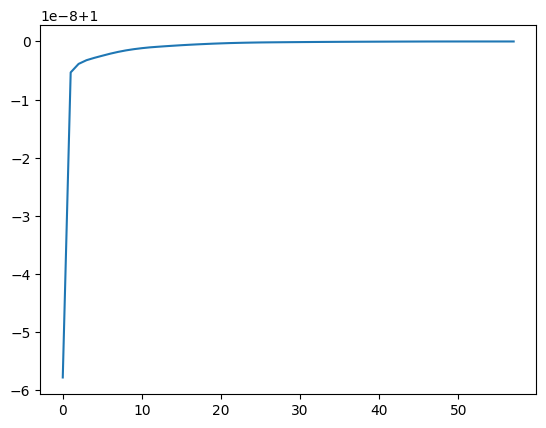

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))